# News Group classification

> **Idea**
Build a model to classify news data into various categories through text classification.

> **Techniques**
Feature extraction  using TF-Idf
Applying any classifier like Naïve bayes to classify the news to one of 20 groups
You can apply more than one classifier and select the best one according its accuracy 

> The **dataset** is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups.



![Example screenshot](extras/banner.png)

# Import Libraries

In [1]:
#Load files 
from sklearn.datasets import load_files
#train test split
from sklearn.model_selection import train_test_split
#TF-df
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#classifers
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pandas as pd
import numpy as np
import pickle
from textblob import Word
from os import listdir
from os.path import join
#Stemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
#tokenize
from nltk.tokenize import word_tokenize

import string
#plotting
import seaborn as sns
import matplotlib.pyplot as plt
#regular expression
import re
#stopwords
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
path = 'Data/20news-19997'   #path of the folder

In [3]:
categories=[]
for folder in listdir(path):
    categories.append(folder)
    
print("Number of Categories = " , len(categories))
categories


Number of Categories =  20


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
#newsdata = load_files(path, description=None, categories=categories,load_content=True, shuffle=True, encoding='windows-1252', decode_error='strict', random_state=0)

In [5]:
#Save The newsdata in Pickle

# with open('Data/Pickle/newsdata.pickle', 'wb') as f:
#      pickle.dump(newsdata, f)

In [4]:
#retrive data from pickle
newsdata = pd.read_pickle ('Data/Pickle/newsdata.pickle')

# Plotting

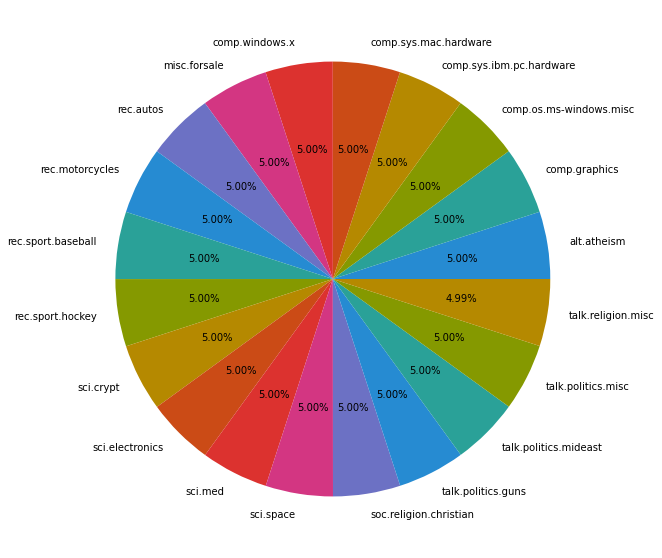

In [5]:
category_counts = pd.Series(newsdata.target).value_counts()
plt.style.use('Solarize_Light2') # or plt.style.use('seaborn')
plt.figure(figsize=(10,10))
plt.pie(category_counts, labels=newsdata.target_names, autopct='%1.2f%%')
plt.show()

# preproccessing
- Check If the word is a string or not
- Remove Stopwords
- Remove wrong punctaution

### Check Word is String

In [8]:
def checkstring(word):
    for i in word:
        if((i>='0' and i<='9') or (i in set(string.punctuation))):
            return 0
    return 1

### Cleaning Data

In [6]:
def cleaningdata(data):

    # Convert to lowercase and remove non-word characters
    data = re.sub(r'\W', ' ', data.lower())
    
    # Tokenize the data
    text_tokens = word_tokenize(data)
    
    # Remove stop words and punctuation, and filter out short words
    stop_words = set(stopwords.words('english')).union(set(string.punctuation)).union({"''", '``', ':', '--', '.', '...'})
    tokens_without_sw = [word for word in text_tokens if (word not in stop_words and len(word) > 2)]
  
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens_lemmatized = [lemmatizer.lemmatize(word) for word in tokens_without_sw]
    
    return ' '.join(tokens_lemmatized)

In [10]:
# cleaneddata=[]
# for data,target in zip(newsdata.data,newsdata.target):
#      cleaneddata.append([target,cleaningdata(data)]) 

### Save The Data in a Pickle

In [11]:
# with open('Data/Pickle/cleaneddata.pickle', 'wb') as f:
#     pickle.dump(cleaneddata, f)
     
# with open('Data/Pickle/targetnames.pickle', 'wb') as f:
#     pickle.dump(newsdata.target_names, f)
    

### Retrive Data From Pickle

In [7]:
#read data after clean it from file
cleaned_data = pd.read_pickle ('Data/Pickle/cleaneddata.pickle')
target_names = pd.read_pickle ('Data/Pickle/targetnames.pickle')

In [8]:
# Split data into train and test sets with an 80:20 ratio
x = [data for target, data in cleaned_data]
y = [target_names[target] for target, data in cleaned_data]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Calculate the frequency of the targets in the train set
categories, frequency_train = np.unique(y_train, return_counts=True)

### ploting graph for train data with it frequency of tragets 

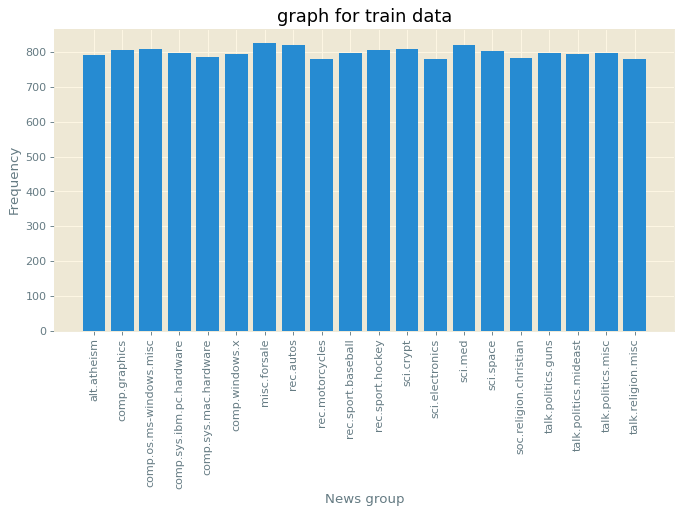

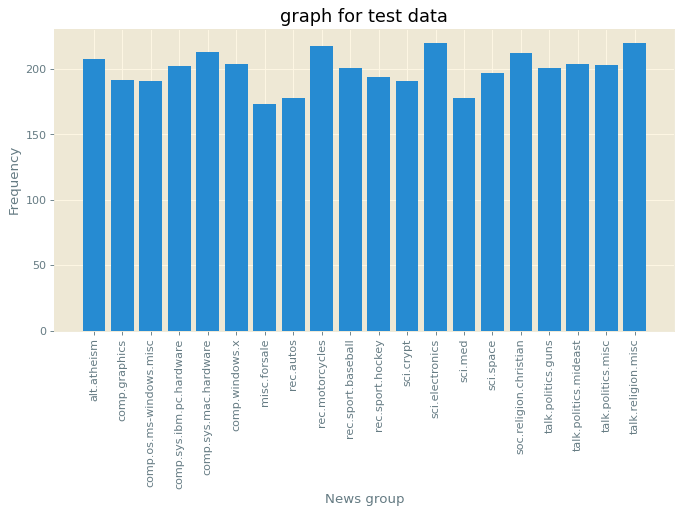

In [9]:
#ploting graph for train data with it frequency of tragets 
figure = plt.figure(figsize=(10,5),dpi=80,facecolor='w',edgecolor='k')
plt.bar(target_names,frequency_train)
plt.xticks(rotation=90)
plt.title('graph for train data')
plt.xlabel('News group')
plt.ylabel('Frequency')
plt.show()
#calculate frequency_train for tragets test data
categories,frequency_train = np.unique(y_test,return_counts=True)
#ploting graph for test data with it frequency of tragets 
figure = plt.figure(figsize=(10,5),dpi=80,facecolor='w',edgecolor='k')
plt.bar(target_names,frequency_train)
plt.xticks(rotation=90)
plt.title('graph for test data')
plt.xlabel('News group')
plt.ylabel('Frequency')
plt.show()

### Extracting features from text files

In [10]:
#tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)

# TfidfVectorizer(ngram_range=(1, 3), use_idf=True, min_df=3, max_df=0.5)
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(x_train)
X_test_tfidf = vectorizer.transform(x_test)

In [16]:
# # #####################Extracting features from text files########################
# #note : use it if there is different tasks # 
# count_vect = CountVectorizer()
# #calculates the number of occurrences of each word
# X_train_counts = count_vect.fit_transform(x_train)
# # used to count the TF-IDF value of each word in the vectorizer
# tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
# X_train_tfidf = tf_transformer.transform(X_train_counts)
# # Transform test data using the pre-fitted count vectorizer and tfidf transformer
# X_test_tfidf = tf_transformer.transform(count_vect.transform(x_test))

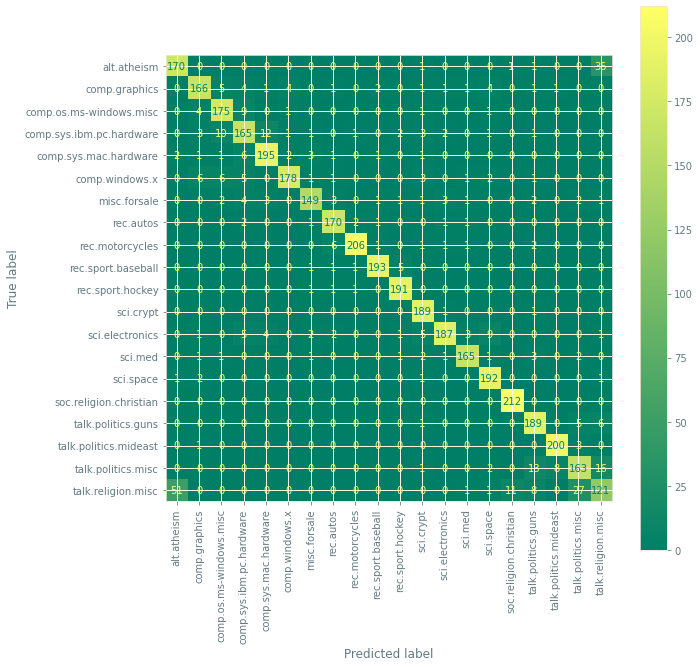

MultinomialNB Test Score: 0.8940
MultinomialNB Train Score: 0.9497
----------------------------------------------------------------------------------------------
                          precision    recall  f1-score   support

             alt.atheism       0.76      0.82      0.79       208
           comp.graphics       0.90      0.86      0.88       192
 comp.os.ms-windows.misc       0.88      0.92      0.90       191
comp.sys.ibm.pc.hardware       0.82      0.82      0.82       202
   comp.sys.mac.hardware       0.91      0.92      0.91       213
          comp.windows.x       0.96      0.87      0.91       204
            misc.forsale       0.93      0.86      0.89       173
               rec.autos       0.91      0.96      0.93       178
         rec.motorcycles       0.98      0.94      0.96       218
      rec.sport.baseball       0.97      0.96      0.96       201
        rec.sport.hockey       0.95      0.98      0.97       194
               sci.crypt       0.90      0.99

In [17]:
# nb = MultinomialNB()
# nb.fit(X_train_tfidf, y_train)

# with open('Data/Models/NBmodel.pickle', 'wb') as f:
#        pickle.dump(nb, f)


nb =  pd.read_pickle ('Data/Models/NBmodel.pickle')

# Make predictions on test data and display confusion matrix
predictions_testnb = nb.predict(X_test_tfidf)
conf_matrix_testnb = confusion_matrix(y_test, predictions_testnb)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_testnb, display_labels=target_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')
plt.show()

# Calculate and print the test score
test_scorenb = accuracy_score(y_test, predictions_testnb)
print(f'MultinomialNB Test Score: {test_scorenb:.4f}')

# Make predictions on train data
predictions_trainnb = nb.predict(X_train_tfidf)

# Calculate and print the train score
train_scorenb = accuracy_score(y_train, predictions_trainnb)
print(f'MultinomialNB Train Score: {train_scorenb:.4f}')

print("----------------------------------------------------------------------------------------------")
print(classification_report(y_test, predictions_testnb))

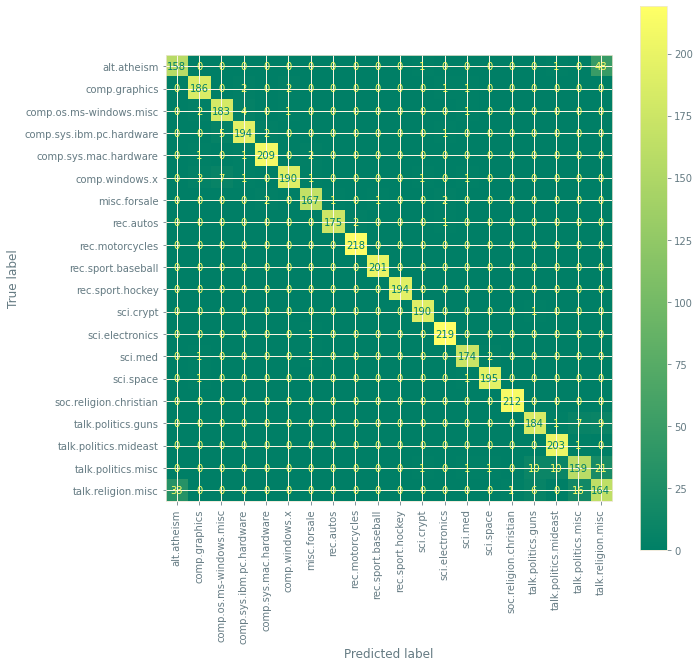

SGDClassifier Test Score: 0.9437
SGDClassifier Train Score: 0.9729
----------------------------------------------------------------------------------------------
                          precision    recall  f1-score   support

             alt.atheism       0.83      0.76      0.79       208
           comp.graphics       0.96      0.97      0.96       192
 comp.os.ms-windows.misc       0.94      0.96      0.95       191
comp.sys.ibm.pc.hardware       0.96      0.96      0.96       202
   comp.sys.mac.hardware       0.98      0.98      0.98       213
          comp.windows.x       0.98      0.93      0.96       204
            misc.forsale       0.97      0.97      0.97       173
               rec.autos       0.99      0.98      0.99       178
         rec.motorcycles       0.99      1.00      1.00       218
      rec.sport.baseball       1.00      1.00      1.00       201
        rec.sport.hockey       1.00      1.00      1.00       194
               sci.crypt       0.98      0.99

In [18]:
# Train a SGD classifier
# sgd = SGDClassifier()
# sgd.fit(X_train_tfidf, y_train)

#  with open('Data/Models/SGDmodel.pickle', 'wb') as f:
#        pickle.dump(sgd, f)

sgd =  pd.read_pickle ('Data/Models/SGDmodel.pickle')

# Make predictions on test data and display confusion matrix
predictions_testsgd = sgd.predict(X_test_tfidf)
conf_matrix_testsgd = confusion_matrix(y_test, predictions_testsgd)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_testsgd, display_labels=target_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')
plt.show()

# Calculate and print the test score
test_scoresgd = accuracy_score(y_test, predictions_testsgd)
print(f'SGDClassifier Test Score: {test_scoresgd:.4f}')

# Make predictions on train data
predictions_trainsgd = sgd.predict(X_train_tfidf)

# Calculate and print the train score
train_scoresgd = accuracy_score(y_train, predictions_trainsgd)
print(f'SGDClassifier Train Score: {train_scoresgd:.4f}')

print("----------------------------------------------------------------------------------------------")
print(classification_report(y_test, predictions_testsgd))

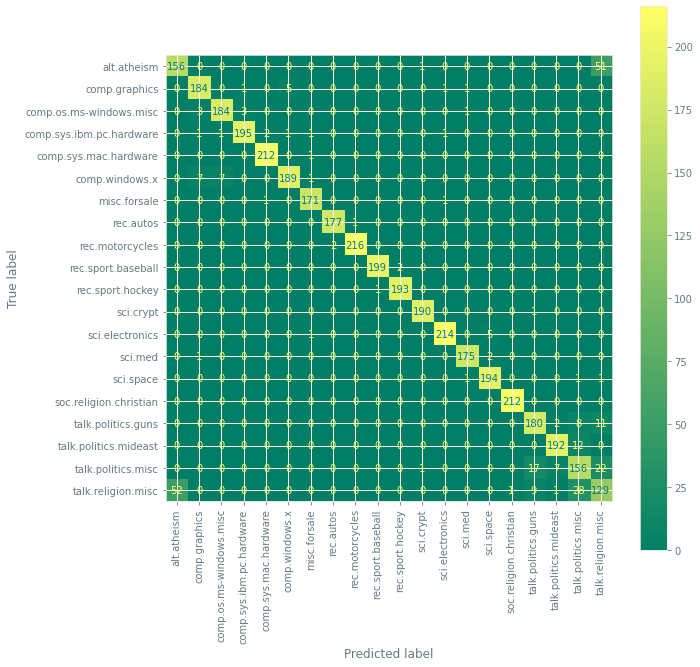

RandomForestClassifier Test Score: 0.9295
RandomForestClassifier Train Score: 0.9801
----------------------------------------------------------------------------------------------
                          precision    recall  f1-score   support

             alt.atheism       0.75      0.75      0.75       208
           comp.graphics       0.94      0.96      0.95       192
 comp.os.ms-windows.misc       0.96      0.96      0.96       191
comp.sys.ibm.pc.hardware       0.98      0.97      0.97       202
   comp.sys.mac.hardware       0.99      1.00      0.99       213
          comp.windows.x       0.97      0.93      0.95       204
            misc.forsale       0.98      0.99      0.98       173
               rec.autos       0.99      0.99      0.99       178
         rec.motorcycles       1.00      0.99      0.99       218
      rec.sport.baseball       0.99      0.99      0.99       201
        rec.sport.hockey       0.99      0.99      0.99       194
               sci.crypt   

In [19]:
# rf = RandomForestClassifier()
# rf.fit(X_train_tfidf, y_train)

# with open('Data/Models/RFCmodel.pickle', 'wb') as f:
#       pickle.dump(rf, f)


rf =  pd.read_pickle ('Data/Models/RFCmodel.pickle')

# Make predictions on test data and display confusion matrix
predictions_testrf = rf.predict(X_test_tfidf)
conf_matrix_testrf = confusion_matrix(y_test, predictions_testrf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_testrf, display_labels=target_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')
plt.show()

# Calculate and print the test score
test_scorerf = accuracy_score(y_test, predictions_testrf)
print(f'RandomForestClassifier Test Score: {test_scorerf:.4f}')

# Make predictions on train data
predictions_trainrf = rf.predict(X_train_tfidf)

# Calculate and print the train score
train_scorerf = accuracy_score(y_train, predictions_trainrf)
print(f'RandomForestClassifier Train Score: {train_scorerf:.4f}')

print("----------------------------------------------------------------------------------------------")
print(classification_report(y_test, predictions_testrf))

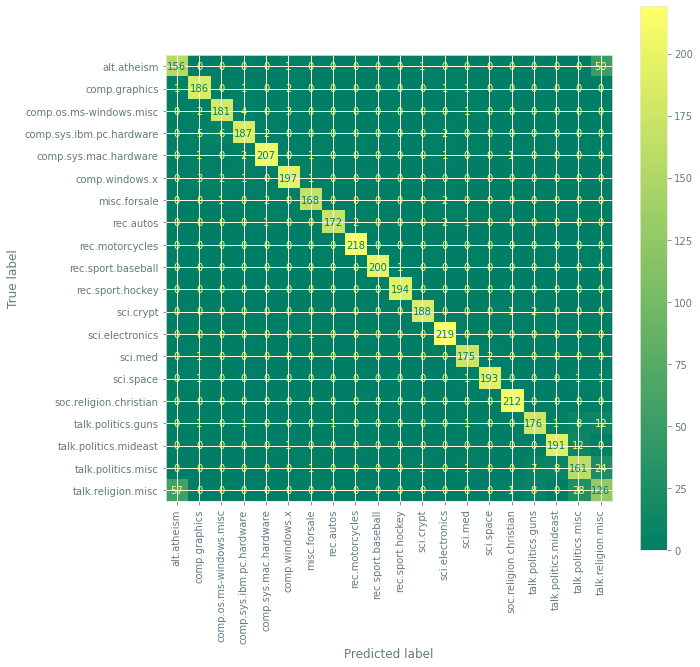

SVM Test Score: 0.9267
SVM Train Score: 0.9801
----------------------------------------------------------------------------------------------
                          precision    recall  f1-score   support

             alt.atheism       0.73      0.75      0.74       208
           comp.graphics       0.93      0.97      0.95       192
 comp.os.ms-windows.misc       0.95      0.95      0.95       191
comp.sys.ibm.pc.hardware       0.95      0.93      0.94       202
   comp.sys.mac.hardware       0.98      0.97      0.97       213
          comp.windows.x       0.97      0.97      0.97       204
            misc.forsale       0.98      0.97      0.97       173
               rec.autos       0.99      0.97      0.98       178
         rec.motorcycles       0.99      1.00      1.00       218
      rec.sport.baseball       1.00      1.00      1.00       201
        rec.sport.hockey       0.99      1.00      1.00       194
               sci.crypt       0.99      0.98      0.99       191

In [12]:
#support vector machine  ===>  note : Very Very Slow #
# svm = SVC(C=1000,kernel='rbf',gamma = 0.1)
# svm.fit(X_train_tfidf, y_train)

# with open('Data/Models/SVMmodel.pickle', 'wb') as f:
#       pickle.dump(svm, f)

svm =  pd.read_pickle ('Data/Models/SVMmodel.pickle')


# # Make predictions on test data and display confusion matrix

#predictions_testsvm = svm.predict(X_test_tfidf)

# with open('Data/Models/svmtestpredict.pickle', 'wb') as f:
#       pickle.dump(predictions_testsvm, f)


predictions_testsvm =  pd.read_pickle ('Data/Models/svmtestpredict.pickle')

conf_matrix_testsvm= confusion_matrix(y_test, predictions_testsvm)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_testsvm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')
plt.show()

# Calculate and print the test score
test_scoresvm = accuracy_score(y_test, predictions_testsvm)
print(f'SVM Test Score: {test_scoresvm:.4f}')

# Make predictions on train data
# predictions_trainsvm = svm.predict(X_train_tfidf)

# with open('Data/Models/svmtrainpredict.pickle', 'wb') as f:
#       pickle.dump(predictions_trainsvm, f)

predictions_trainsvm =  pd.read_pickle ('Data/Models/svmtrainpredict.pickle')

# Calculate and print the train score
train_scoresvm = accuracy_score(y_train, predictions_trainsvm)
print(f'SVM Train Score: {train_scoresvm:.4f}')

print("----------------------------------------------------------------------------------------------")
print(classification_report(y_test, predictions_testsvm))